In [203]:
import os
import numpy as np
from keras.models import load_model
mpath = "/home/mirabot/googledrive/deeplearning/seaiceprj/mpfdata/model/"
mname = "igarss1109.h5"
model = load_model(mpath+mname)

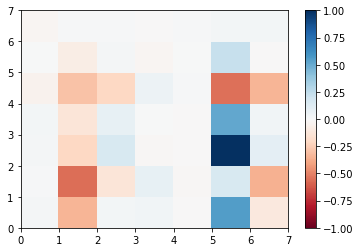

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline
w = model.layers[0].get_weights()[0]
w = w/np.amax(abs(w))
w_min, w_max = -np.abs(w).max(), np.abs(w).max()
plt.pcolor(w,cmap='RdBu',vmin=w_min, vmax=w_max)
plt.colorbar()

In [205]:
"""calculate input relative importance"""
w1 = model.layers[0].get_weights()[0]
w2 = model.layers[2].get_weights()[0]
#w3 = model.layers[4].get_weights()[0]
mvp = abs(w1).dot(abs(w2))#.dot(abs(w3))
print(mvp)
mvpr = mvp.sum(axis=1)
print(mvpr)

for r in mvpr:
    print(r/mvpr.sum()*100)

[[ 0.09478275  0.09512284  0.32784626]
 [ 0.12869233  0.10493501  0.1751321 ]
 [ 0.11224081  0.12084455  0.53318149]
 [ 0.05981756  0.06486326  0.2810165 ]
 [ 0.12277912  0.11048871  0.33180121]
 [ 0.02732975  0.02959904  0.12726329]
 [ 0.00745787  0.00683196  0.01749236]]
[ 0.51775181  0.40875942  0.76626682  0.40569732  0.56506902  0.18419208
  0.03178218]
17.9804980755
14.195407927
26.6109347343
14.0890672803
19.6237310767
6.39662742615
1.10373245552


In [181]:
mvp[0]

array([ 9.10770416,  6.34933996,  4.97707844], dtype=float32)

In [116]:
"""Analyze weights
Qi Liu
"""

from __future__ import print_function

import h5py

def print_structure(weight_file_path):
    """
    Prints out the structure of HDF5 file.

    Args:
      weight_file_path (str) : Path to the file to analyze
    """
    f = h5py.File(weight_file_path)
    try:
        if len(f.attrs.items()):
            print("{} contains: ".format(weight_file_path))
            print("Root attributes:")
        for key, value in f.attrs.items():
            print("  {}: {}".format(key, value))

        if len(f.items())==0:
            return

        for layer, g in f.items():
            print("  {}".format(layer))
            print("    Attributes:")
            for key, value in g.attrs.items():
                print("      {}: {}".format(key, value))

            print("    Dataset:")
            for p_name in g.keys():
                param = g[p_name]
                print("      {}: {}".format(p_name, param.shape))
    finally:
        f.close()

if __name__ == '__main__':
    weight_file_path = "/home/mirabot/googledrive/deeplearning/seaiceprj/mpfdata/model/weights.h5"
    print_structure(weight_file_path)


/home/mirabot/googledrive/deeplearning/seaiceprj/mpfdata/model/weights.h5 contains: 
Root attributes:
  layer_names: ['dense_13' 'activation_9' 'dense_14' 'activation_10' 'dense_15']
  activation_10
    Attributes:
      weight_names: []
    Dataset:
  activation_9
    Attributes:
      weight_names: []
    Dataset:
  dense_13
    Attributes:
      weight_names: ['dense_13_W' 'dense_13_b']
    Dataset:
      dense_13_W: (7, 3)
      dense_13_b: (3,)
  dense_14
    Attributes:
      weight_names: ['dense_14_W' 'dense_14_b']
    Dataset:
      dense_14_W: (3, 6)
      dense_14_b: (6,)
  dense_15
    Attributes:
      weight_names: ['dense_15_W' 'dense_15_b']
    Dataset:
      dense_15_W: (6, 3)
      dense_15_b: (3,)


In [68]:
A=np.random.rand(3,3)
X=np.random.rand(3,1)
Y = A.dot(X)

In [79]:
from numpy.linalg import inv
#B = Y*X.reshape(1,3)*inv(X*X.reshape(1,3))


In [78]:
X=np.random.rand(3,1)
np.linalg.matrix_rank(K)

1

In [77]:
K = X*X.reshape(1,3)
K

array([[ 0.62371225,  0.46959427,  0.24663253],
       [ 0.46959427,  0.35355853,  0.18569016],
       [ 0.24663253,  0.18569016,  0.09752511]])